In [398]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_excel('D:/Telco_customer_churn.xlsx')

In [236]:
df = data.copy()

In [17]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df['Total Charges'] = df['Total Charges'].replace(' ', np.nan )

In [ ]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [ ]:
df['Total Charges'] = df['Total Charges'].fillna(2283.300441)

In [ ]:
df['Total Charges'].dtype

In [19]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [25]:
df[df['CustomerID'].duplicated()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [29]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [37]:
df['Country'].value_counts()

Country
United States    7043
Name: count, dtype: int64

In [41]:
df['State'].value_counts()

State
California    7043
Name: count, dtype: int64

In [49]:
df['City'].value_counts().head(20)

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
Fresno             64
Long Beach         60
Oakland            52
Stockton           44
Bakersfield        40
Glendale           40
Riverside          32
Berkeley           32
Whittier           30
Pasadena           30
Santa Barbara      28
Anaheim            28
San Bernardino     28
Modesto            28
Irvine             28
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

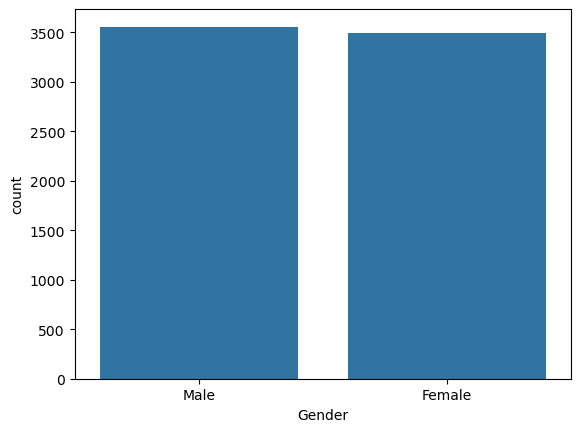

In [55]:
sns.countplot(x=df['Gender'])

In [57]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [65]:
dc = df.columns

In [69]:
for i in dc:
    vc = df[i].value_counts()
    print (vc)
    print('*'*50)
    print(' '*50)

CustomerID
3668-QPYBK    1
9169-BSVIN    1
0206-OYVOC    1
6418-HNFED    1
8805-JNRAZ    1
             ..
6797-UCJHZ    1
5016-IBERQ    1
3003-CMDUU    1
5148-HKFIR    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
**************************************************
                                                  
Count
1    7043
Name: count, dtype: int64
**************************************************
                                                  
Country
United States    7043
Name: count, dtype: int64
**************************************************
                                                  
State
California    7043
Name: count, dtype: int64
**************************************************
                                                  
City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena  

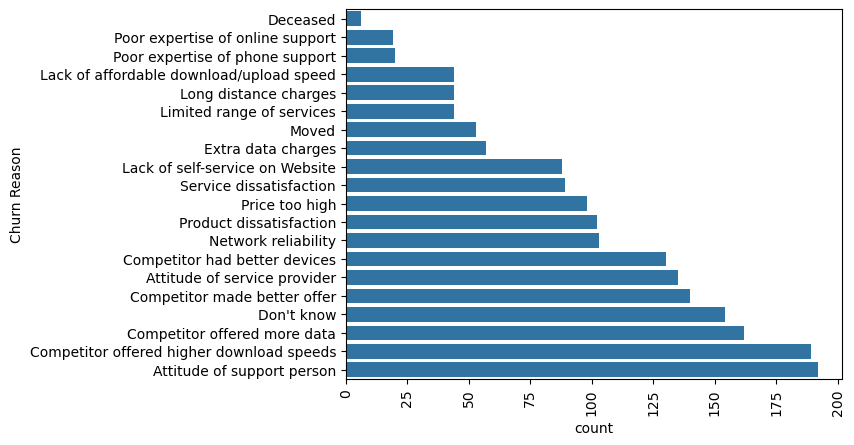

In [83]:
sns.countplot(y=df['Churn Reason'])
plt.xticks(rotation=90)
plt.show()

In [85]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

<Axes: xlabel='count', ylabel='Contract'>

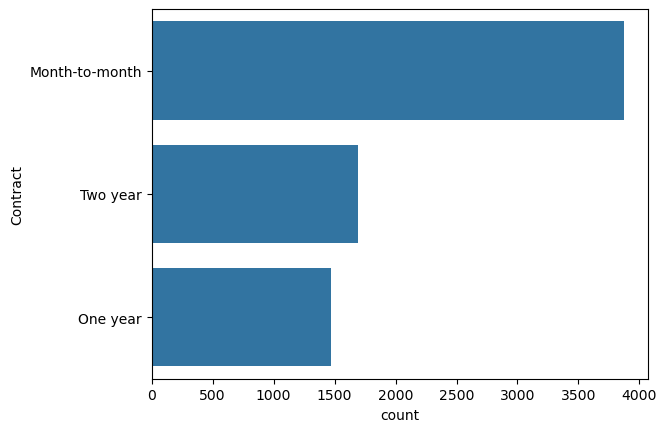

In [87]:
sns.countplot(df['Contract'])

In [103]:
cc = df.groupby('Churn Label')['City'].value_counts()

In [105]:
most_churned_city = cc['Yes'].idxmax()
most_churned_count = cc['Yes'].max()

In [107]:
most_churned_city

'Los Angeles'

In [113]:
cr = df[df['Churn Label'] == 'Yes']['City'].value_counts()
cr_2 = cr.head(20)

<Axes: ylabel='City'>

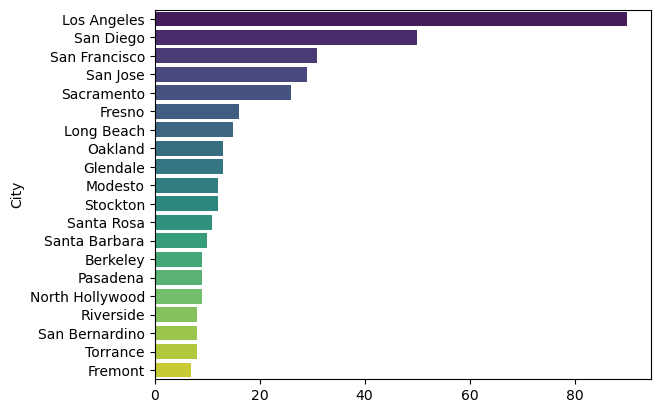

In [119]:
sns.barplot(x=cr_2.values, y=cr_2.index, palette="viridis")

<Axes: xlabel='Tenure Months', ylabel='Count'>

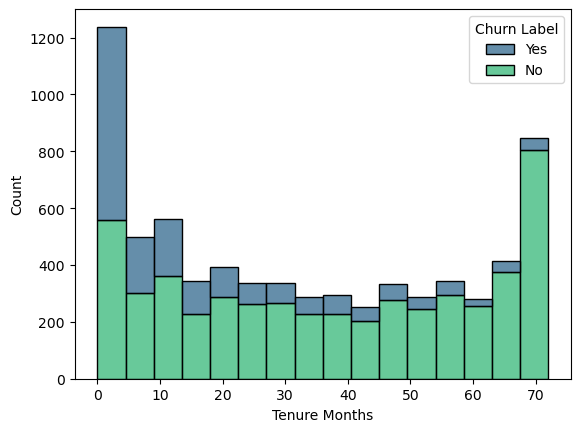

In [123]:
sns.histplot(data=df, x="Tenure Months", hue="Churn Label", multiple="stack", palette="viridis")

<Axes: xlabel='Contract', ylabel='Count'>

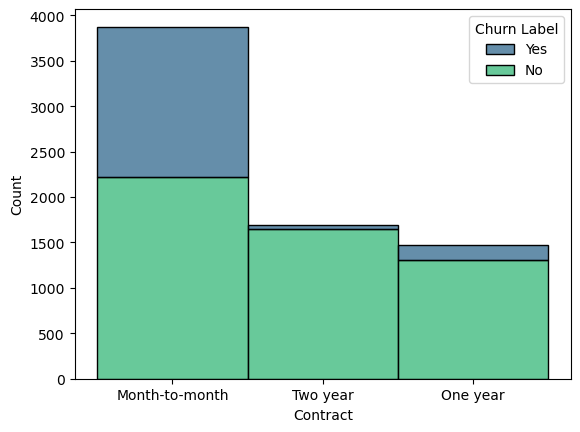

In [131]:
sns.histplot(data=df, x="Contract", hue="Churn Label", multiple="stack", palette="viridis")

<Axes: xlabel='Internet Service', ylabel='count'>

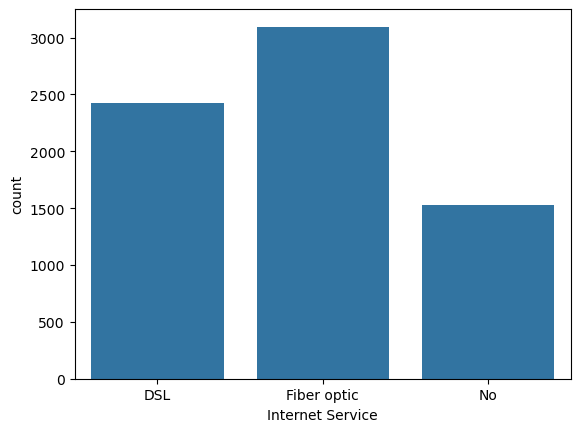

In [135]:
sns.countplot(x=df['Internet Service'])

In [137]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

<Axes: xlabel='Internet Service', ylabel='Count'>

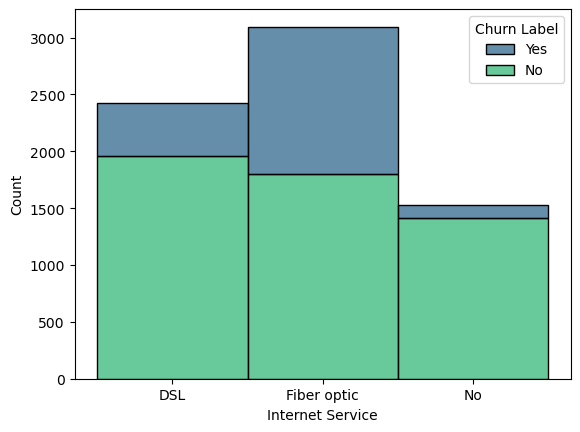

In [139]:
sns.histplot(data=df, x="Internet Service", hue="Churn Label", multiple="stack", palette="viridis")

## Let's summarize what we analyze from the data:
* The most common reason for customer churn is 'Attitude of support person' and the second reason is 'Competitor offered higher download speeds'.
* The highest customer churn is from Los Angeles.
* The lowest churn rate among customers without Internet services (but there are fewer such customers).
* 69.2% of the clients in the churn were connected to the fiber optic Internet.

# Feture Selection

In [238]:
df = df.drop(['Country','State','Count','Zip Code','Churn Reason','City','Churn Score','Churn Value','CLTV','CustomerID','Lat Long',
                  'Latitude','Longitude'], axis=1)

In [242]:
df.shape

(7043, 19)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [170]:
y = df['Churn Label']

In [310]:
y.replace(to_replace='Yes', value=1, inplace=True)
y.replace(to_replace='No',  value=0, inplace=True)

In [312]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Label, Length: 7043, dtype: int64

In [240]:
df = df.drop('Churn Label', axis=1)

In [210]:
le = LabelEncoder() 

In [222]:
en_c = df.drop(['Monthly Charges', 'Total Charges','Tenure Months'], axis=1)

In [224]:
col = en_c.columns

In [226]:
col

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object')

In [246]:
for i in col:
    df[i] = le.fit_transform(df[i])

In [248]:
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
1,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
2,0,0,0,1,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.5
3,0,0,1,1,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05
4,1,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.4
7039,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5
7040,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9
7041,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int32  
 1   Senior Citizen     7043 non-null   int32  
 2   Partner            7043 non-null   int32  
 3   Dependents         7043 non-null   int32  
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   int32  
 6   Multiple Lines     7043 non-null   int32  
 7   Internet Service   7043 non-null   int32  
 8   Online Security    7043 non-null   int32  
 9   Online Backup      7043 non-null   int32  
 10  Device Protection  7043 non-null   int32  
 11  Tech Support       7043 non-null   int32  
 12  Streaming TV       7043 non-null   int32  
 13  Streaming Movies   7043 non-null   int32  
 14  Contract           7043 non-null   int32  
 15  Paperless Billing  7043 non-null   int32  
 16  Payment Method     7043 

In [272]:
df['Total Charges'].describe()

count     7043.0
unique    6531.0
top         20.2
freq        11.0
Name: Total Charges, dtype: float64

In [274]:
df[df['Total Charges'] == ' ']

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
2234,0,0,1,0,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,
2438,1,0,0,0,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,
2568,0,0,1,0,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,
2667,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,
2856,0,0,1,0,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,
4331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,
4687,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,
5104,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,
5719,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,
6772,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,


In [314]:
xy = pd.concat([df, y], axis=1)

In [316]:
xy.corr()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
Gender,1.000000,-0.001874,-0.001808,0.005229,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
Senior Citizen,-0.001874,1.000000,0.016479,-0.174396,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.363430,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.005229,-0.174396,0.363430,1.000000,0.131376,0.000625,-0.028842,0.082993,0.135434,0.084299,0.056460,0.112662,0.016671,-0.000669,0.202279,-0.118963,-0.025370,-0.144206,0.032128,-0.248542
Tenure Months,0.005106,0.016567,0.379697,0.131376,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
Phone Service,-0.006488,0.008576,0.017706,0.000625,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
Multiple Lines,-0.006739,0.146185,0.142410,-0.028842,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
Internet Service,-0.000863,-0.032310,0.000891,0.082993,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
Online Security,-0.015017,-0.128221,0.150828,0.135434,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
Online Backup,-0.012057,-0.013632,0.153130,0.084299,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


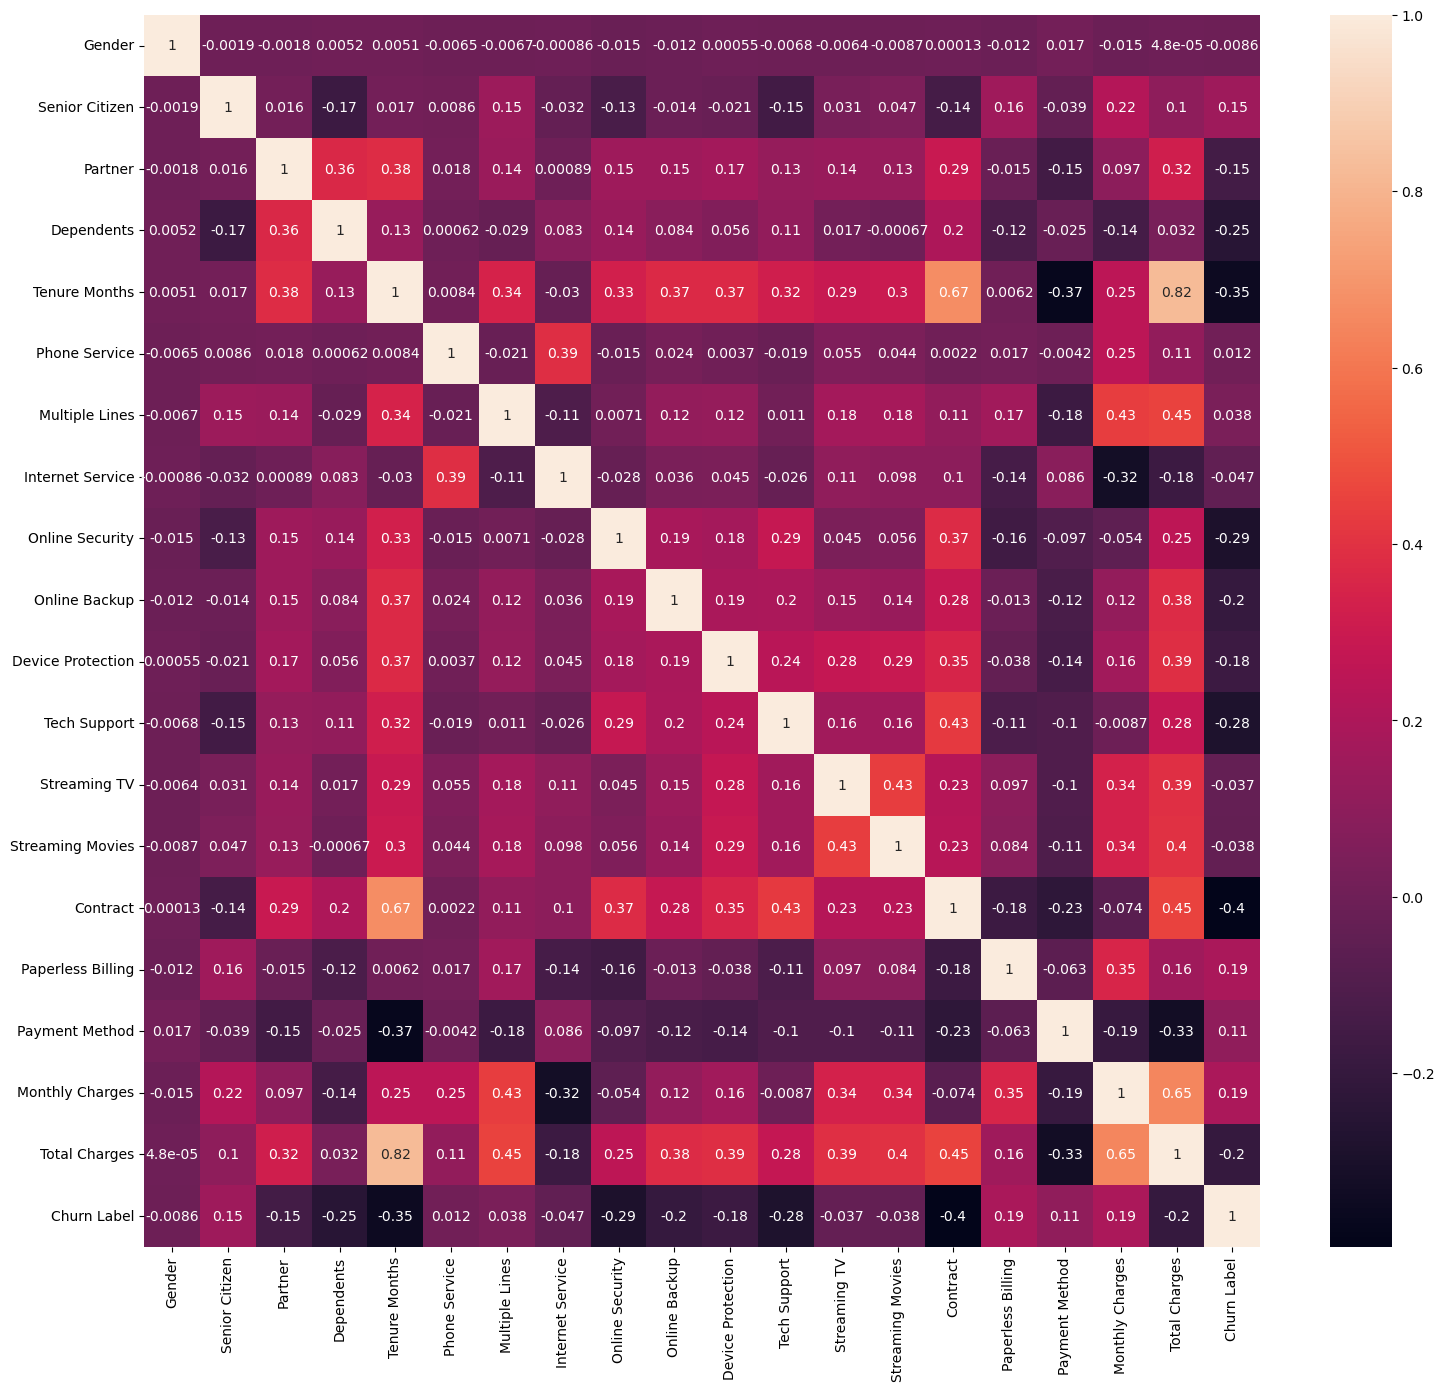

In [322]:
plt.figure(figsize=(18,16))
sns.heatmap(xy.corr(), annot=True)
plt.show()

In [324]:
df.shape

(7043, 19)

In [326]:
y.value_counts()

Churn Label
0    5174
1    1869
Name: count, dtype: int64

## We have Imbalanced Dataset

In [329]:
from imblearn.over_sampling import SMOTE

In [331]:
smt = SMOTE(random_state=42)

Xs, ys = smt.fit_resample(df,y)

In [333]:
Xs.shape

(10348, 19)

In [337]:
ys.shape

(10348,)

In [341]:
ys.value_counts()

Churn Label
1    5174
0    5174
Name: count, dtype: int64

In [443]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)

# Model Selection

In [346]:
models = {
    'gb' : GradientBoostingClassifier(random_state=42),
    'xg' : XGBClassifier(random_state=42),
    'rf' : RandomForestClassifier(random_state=42),
    'lr' : LogisticRegression(random_state=42)
}

In [372]:
result = []

for name, model in models.items():
    model.fit(X_train,y_train)

    yp = model.predict(X_test)

    acs = accuracy_score(yp, y_test)
    f1 = f1_score(yp, y_test)
    rs = recall_score(yp, y_test)
    ps = precision_score(yp, y_test)

    result.append({
        'Model' : name,
        'accuracy_score' : acs,
        'f1' : f1,
        'recall' : rs,
        'ps' : ps
    })

In [374]:
result = pd.DataFrame(result)

In [376]:
result

,Model,accuracy_score,f1,recall,ps
0,gb,0.835749,0.842007,0.825889,0.858768
1,xg,0.855072,0.858890,0.852474,0.865403
2,rf,0.867633,0.870142,0.870142,0.870142
3,lr,0.808213,0.813702,0.805762,0.821801


# HyperParameter Tuning

In [379]:
prm = {
    'n_estimators' : [50,100,150],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2,3,4,5],
    'max_features' : ['sqrt', 'log2', None]
}

In [381]:
rf = RandomForestClassifier(random_state=42)

In [383]:
rs = RandomizedSearchCV(
    estimator= rf,
    param_distributions= prm,
    n_iter=100,
    n_jobs=-1,
    random_state=42,
    cv=5,
    scoring='f1'
)

In [385]:
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='f1')

In [387]:
rs.best_score_

0.8236599273089483

In [391]:
rs.best_params_

{'n_estimators': 50,
 'max_features': 'log2',
 'max_depth': 5,
 'criterion': 'gini'}

* Training Model on Best Params

In [459]:
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
   max_features='log2',
    criterion= 'gini'
)

In [461]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=50)

In [462]:
yp = rf.predict(X_test)

acs = accuracy_score(yp, y_test)
f1 = f1_score(yp, y_test)
rs = recall_score(yp, y_test)
ps = precision_score(yp, y_test)

In [465]:
print ('Accuracy Score: ', acs)
print ('F1_score: ', f1)
print ('Recall: ', rs)
print ('Presison: ', ps)

Accuracy Score:  0.8236714975845411
F1_score:  0.832183908045977
Recall:  0.8080357142857143
Presison:  0.8578199052132701
